In [1]:
from __future__ import division
import os
import numpy as np 
import pandas as pd
from helpers import data_provider
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# figure adjustments for compatibility with latex
%matplotlib inline
plt.style.use('classic')
plt.rc("figure", facecolor="white")


fig_width_pt = 469.755  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'text.fontsize': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': True,
          'figure.figsize': fig_size}
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams.update(params)

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\matplotlib\__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# load the data set
data_process = pd.read_csv('clean_houses_95.csv',parse_dates=['Time'], index_col='Time')
data = data_process.copy(deep=True)

In [5]:
# keep the date time window which is used for modeling
data = data['2014-04':'2015-03']

In [6]:
# create seasonal variables
data['Hour'] =  pd.DatetimeIndex(data.index).hour
data['Day'] = pd.DatetimeIndex(data.index).weekday_name
data['Month'] = pd.DatetimeIndex(data.index).month

## Hourly Exploration

In [7]:
# keep the house of choice for modelling and the time variable
data_modeling = data.copy(deep=True)
data_modeling = data_modeling.drop(['Day','Month'],axis=1)
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
house_nr = 4
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling4 = data_modeling.drop(drop_houses, axis=1)
df4 = data_modeling4.pivot(columns=data_modeling4.columns[1], index=data_modeling4.index)
df4.columns = df4.columns.droplevel()

In [8]:
house_nr = 6
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling6 = data_modeling.drop(drop_houses, axis=1)
df6 = data_modeling6.pivot(columns=data_modeling6.columns[1], index=data_modeling6.index)
df6.columns = df6.columns.droplevel()

In [9]:
house_nr = 13
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling13 = data_modeling.drop(drop_houses, axis=1)
df13 = data_modeling13.pivot(columns=data_modeling13.columns[1], index=data_modeling13.index)
df13.columns = df13.columns.droplevel()

In [10]:
house_nr = 16
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling16 = data_modeling.drop(drop_houses, axis=1)
df16 = data_modeling16.pivot(columns=data_modeling16.columns[1], index=data_modeling16.index)
df16.columns = df16.columns.droplevel()

In [11]:
flierprops = dict(marker='.', markerfacecolor='grey', markersize=4, fillstyle='none',
                  linestyle='none')

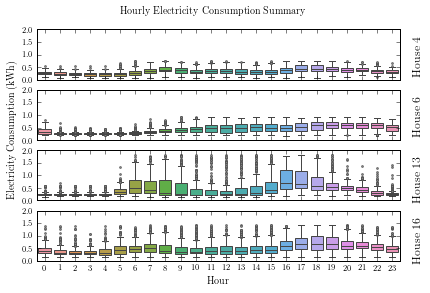

In [12]:
plt.figure(1)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,sharex=True, sharey=True)

sns.boxplot(data=df4, ax=ax1,flierprops= flierprops)
sns.boxplot(data=df6, ax=ax2,flierprops= flierprops)
sns.boxplot(data=df13, ax=ax3,flierprops= flierprops)
sns.boxplot(data=df16, ax=ax4,flierprops= flierprops)
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
#f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax4.set_xlabel('Hour')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_xlabel('')
ax1.set_title('House 4', rotation='vertical',x= 1.05,y=0.6)
ax2.set_title('House 6', rotation='vertical',x= 1.05,y=0.6)
ax3.set_title('House 13', rotation='vertical',x= 1.05,y=0.6)
ax4.set_title('House 16', rotation='vertical',x= 1.05,y=0.6)
ax1.set_ylabel('Electricity Consumption (kWh)',rotation='vertical',x= -0.05,y=-1.0)
f.suptitle('Hourly Electricity Consumption Summary')
plt.savefig('figures/95_percent/hourly_houses.eps')
plt.savefig('figures/95_percent/hourly_houses.pdf')

## Daily exploration

In [13]:
# keep the house of choice for modelling and the time variable
data_modeling = data.copy(deep=True)
data_modeling = data_modeling.drop(['Hour','Month'],axis=1)
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
house_nr = 4
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling4 = data_modeling.drop(drop_houses, axis=1)
df4 = data_modeling4.pivot(columns=data_modeling4.columns[1], index=data_modeling4.index)
df4.columns = df4.columns.droplevel()

In [14]:
house_nr = 6
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling6 = data_modeling.drop(drop_houses, axis=1)
df6 = data_modeling6.pivot(columns=data_modeling6.columns[1], index=data_modeling6.index)
df6.columns = df6.columns.droplevel()

In [15]:
house_nr = 13
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling13 = data_modeling.drop(drop_houses, axis=1)
df13 = data_modeling13.pivot(columns=data_modeling13.columns[1], index=data_modeling13.index)
df13.columns = df13.columns.droplevel()

In [16]:
house_nr = 16
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling16 = data_modeling.drop(drop_houses, axis=1)
df16 = data_modeling16.pivot(columns=data_modeling16.columns[1], index=data_modeling16.index)
df16.columns = df16.columns.droplevel()

In [17]:
cols = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df4 = df4[cols]
df6 = df6[cols]
df13 = df13[cols]
df16 = df16[cols]

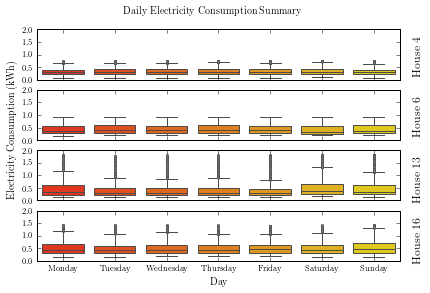

In [18]:
plt.figure(1)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,sharex=True, sharey=True)

sns.boxplot(data=df4, ax=ax1,flierprops= flierprops,palette='autumn')
sns.boxplot(data=df6, ax=ax2,flierprops= flierprops,palette='autumn')
sns.boxplot(data=df13, ax=ax3,flierprops= flierprops,palette='autumn')
sns.boxplot(data=df16, ax=ax4,flierprops= flierprops,palette='autumn')

#f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax4.set_xlabel('Day')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_xlabel('')
ax1.set_title('House 4', rotation='vertical',x= 1.05,y=0.6)
ax2.set_title('House 6', rotation='vertical',x= 1.05,y=0.6)
ax3.set_title('House 13', rotation='vertical',x= 1.05,y=0.6)
ax4.set_title('House 16', rotation='vertical',x= 1.05,y=0.6)
ax1.set_ylabel('Electricity Consumption (kWh)',rotation='vertical',x= -0.05,y=-1.0)
f.suptitle('Daily Electricity Consumption Summary')
plt.savefig('figures/95_percent/daily_houses.eps')
plt.savefig('figures/95_percent/daily_houses.pdf')

## Monthly Exploration

In [19]:
# keep the house of choice for modelling and the time variable
data_modeling = data.copy(deep=True)
data_modeling = data_modeling.drop(['Hour','Day'],axis=1)
houses=[1,2,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20]
house_nr = 4
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling4 = data_modeling.drop(drop_houses, axis=1)
df4 = data_modeling4.pivot(columns=data_modeling4.columns[1], index=data_modeling4.index)
df4.columns = df4.columns.droplevel()

In [20]:
house_nr = 6
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling6 = data_modeling.drop(drop_houses, axis=1)
df6 = data_modeling6.pivot(columns=data_modeling6.columns[1], index=data_modeling6.index)
df6.columns = df6.columns.droplevel()

In [21]:
house_nr = 13
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling13 = data_modeling.drop(drop_houses, axis=1)
df13 = data_modeling13.pivot(columns=data_modeling13.columns[1], index=data_modeling13.index)
df13.columns = df13.columns.droplevel()

In [22]:
house_nr = 16
drop_houses = ['House_'+str(i) for i in houses if i != house_nr]
data_modeling16 = data_modeling.drop(drop_houses, axis=1)
df16 = data_modeling16.pivot(columns=data_modeling16.columns[1], index=data_modeling16.index)
df16.columns = df16.columns.droplevel()

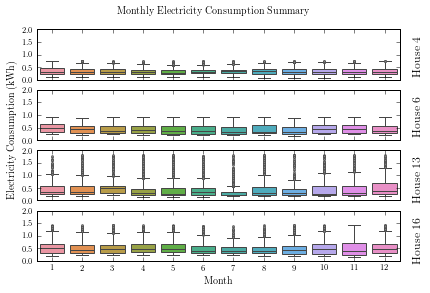

In [23]:
plt.figure(1)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,sharex=True, sharey=True)

sns.boxplot(data=df4, ax=ax1,flierprops= flierprops)
sns.boxplot(data=df6, ax=ax2,flierprops= flierprops)
sns.boxplot(data=df13, ax=ax3,flierprops= flierprops)
sns.boxplot(data=df16, ax=ax4,flierprops= flierprops)

#f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax4.set_xlabel('Month')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_xlabel('')
ax1.set_title('House 4', rotation='vertical',x= 1.05,y=0.6)
ax2.set_title('House 6', rotation='vertical',x= 1.05,y=0.6)
ax3.set_title('House 13', rotation='vertical',x= 1.05,y=0.6)
ax4.set_title('House 16', rotation='vertical',x= 1.05,y=0.6)
ax1.set_ylabel('Electricity Consumption (kWh)',rotation='vertical',x= -0.05,y=-1.0)
f.suptitle('Monthly Electricity Consumption Summary')
plt.savefig('figures/95_percent/monthly_houses.eps')
plt.savefig('figures/95_percent/monthly_houses.pdf')